In [1]:
# ----------------------------------------------------------------------------
# Author        :    Vasileios Perifanis
# Affiliation   :    Euclid team, Democritus University of Thrace, Dept. of Electrical & Computer Engineering
# Created Date  :    03/2022
# version       :    1.0
# ---------------------------------------------------------------------------

In [2]:
import numpy as np # linear algebra
import pandas as pd # data analysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("datasets/titanic_train.csv", header=0) # read csv

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #extract the Salutations

# Assigning the NaN Values the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data['Embarked'].fillna('S',inplace=True)

data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

data['Fare_Range']=pd.qcut(data['Fare'],5)
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data.drop(['Name','Age','Ticket','Fare','Cabin','Initial','Fare_Range','PassengerId'],axis=1,inplace=True)

data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,1,1,0,0
1,1,1,1,1,0,1,2,1,0,3
2,1,3,1,0,0,0,1,0,1,1
3,1,1,1,1,0,0,2,1,0,3
4,0,3,0,0,0,0,2,0,1,1


In [4]:
train,test=train_test_split(data,test_size=0.2,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]].to_numpy()
train_Y=train[train.columns[:1]].to_numpy().ravel()
test_X=test[test.columns[1:]].to_numpy()
test_Y=test[test.columns[:1]].to_numpy().ravel()

In [5]:
def train_sk(train_X, train_Y, test_X, test_Y):
    # initialize classifier
    classifier = MLPClassifier(hidden_layer_sizes=(32,32,32), random_state=0, max_iter=500)

    # train the classifier
    classifier.fit(train_X,train_Y)

    # make predictions on train/test set
    y_pred_train = classifier.predict(train_X)
    y_pred = classifier.predict(test_X)

    # calculate scores
    accuracy_train = accuracy_score(y_pred_train, train_Y)
    precision_train = precision_score(y_pred_train, train_Y)
    recall_train = recall_score(y_pred_train, train_Y)
    f1_train = f1_score(y_pred_train, train_Y)

    accuracy = accuracy_score(y_pred, test_Y)
    precision = precision_score(y_pred, test_Y)
    recall = recall_score(y_pred, test_Y)
    f1 = f1_score(y_pred, test_Y)

    print(f"[Training set] Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1: {f1_train:.4f}\n",
          f"[Testing set] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return accuracy, precision, recall, f1

In [6]:
accuracy, precision, recall, f1 = dict(), dict(), dict(), dict()

In [7]:
acc, prec, rec, f = train_sk(train_X, train_Y, test_X, test_Y)
accuracy['plain'] = acc
precision['plain'] = prec
recall['plain'] = rec
f1['plain'] = f

[Training set] Accuracy: 0.8848, Precision: 0.8718, Recall: 0.8351, F1: 0.8530
 [Testing set] Accuracy: 0.7709, Precision: 0.6957, Recall: 0.7059, F1: 0.7007


# Standardization

In [8]:
from sklearn import preprocessing

In [9]:
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_standard_scaler = scaler.transform(train_X)
test_X_standard_scaler = scaler.transform(test_X)

In [10]:
train_X[0], train_X_standard_scaler[0]

(array([3, 1, 0, 0, 2, 1, 0, 1, 0]),
 array([ 0.8342464 ,  1.35523186, -0.48693486, -0.46765914,  2.59907315,
        -0.51902785, -0.56377913,  0.80744793, -1.3602312 ]))

In [11]:
acc, prec, rec, f = train_sk(train_X_standard_scaler, train_Y, test_X_standard_scaler, test_Y)
accuracy['standard'] = acc
precision['standard'] = prec
recall['standard'] = rec
f1['standard'] = f

[Training set] Accuracy: 0.8961, Precision: 0.8498, Recall: 0.8755, F1: 0.8625
 [Testing set] Accuracy: 0.7654, Precision: 0.6232, Recall: 0.7288, F1: 0.6719


In [12]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X_min_max_scaler = min_max_scaler.transform(train_X)
test_X_min_max_scaler = min_max_scaler.transform(test_X)
train_X[0], train_X_standard_scaler[0], train_X_min_max_scaler[0]

(array([3, 1, 0, 0, 2, 1, 0, 1, 0]),
 array([ 0.8342464 ,  1.35523186, -0.48693486, -0.46765914,  2.59907315,
        -0.51902785, -0.56377913,  0.80744793, -1.3602312 ]),
 array([1.  , 1.  , 0.  , 0.  , 1.  , 0.25, 0.  , 1.  , 0.  ]))

In [13]:
acc, prec, rec, f = train_sk(train_X_min_max_scaler, train_Y, test_X_min_max_scaler, test_Y)
accuracy['minmax'] = acc
precision['minmax'] = prec
recall['minmax'] = rec
f1['minmax'] = f

[Training set] Accuracy: 0.8820, Precision: 0.8388, Recall: 0.8513, F1: 0.8450
 [Testing set] Accuracy: 0.7933, Precision: 0.6522, Recall: 0.7759, F1: 0.7087


In [14]:
accuracy, precision, recall, f1

({'plain': 0.770949720670391,
  'standard': 0.7653631284916201,
  'minmax': 0.7932960893854749},
 {'plain': 0.6956521739130435,
  'standard': 0.6231884057971014,
  'minmax': 0.6521739130434783},
 {'plain': 0.7058823529411765,
  'standard': 0.7288135593220338,
  'minmax': 0.7758620689655172},
 {'plain': 0.7007299270072992,
  'standard': 0.671875,
  'minmax': 0.7086614173228347})

In [15]:
import matplotlib.pyplot as plt

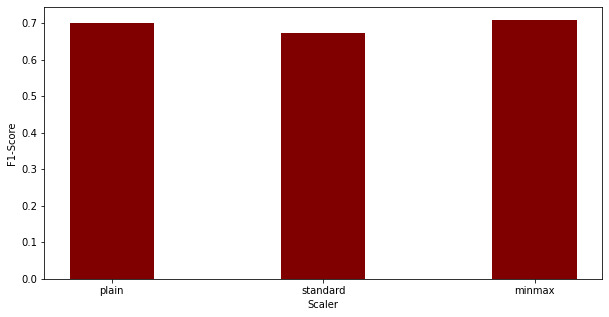

In [16]:
scalers = list(f1.keys())
f_scores = list(f1.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(scalers, f_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Scaler")
plt.ylabel("F1-Score")
plt.show()

In [17]:
# Encoder
enc = preprocessing.OneHotEncoder()
enc.fit(train_X)
train_X_one_hot = enc.transform(train_X).toarray()
test_X_one_hot = enc.transform(test_X).toarray()
train_X_one_hot[0]

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0.])

In [18]:
acc, prec, rec, f = train_sk(train_X_one_hot, train_Y, test_X_one_hot, test_Y)
accuracy['one_hot'] = acc
precision['one_hot'] = prec
recall['one_hot'] = rec
f1['one_hot'] = f

[Training set] Accuracy: 0.8975, Precision: 0.8535, Recall: 0.8759, F1: 0.8646
 [Testing set] Accuracy: 0.7877, Precision: 0.6667, Recall: 0.7541, F1: 0.7077


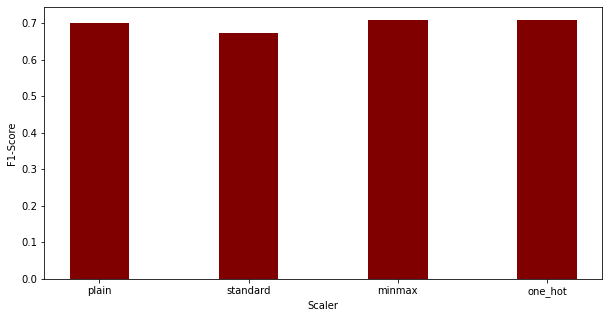

In [19]:
scalers = list(f1.keys())
f_scores = list(f1.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(scalers, f_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Scaler")
plt.ylabel("F1-Score")
plt.show()

In [20]:
f1

{'plain': 0.7007299270072992,
 'standard': 0.671875,
 'minmax': 0.7086614173228347,
 'one_hot': 0.7076923076923076}

In [21]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,1,1,0,0
1,1,1,1,1,0,1,2,1,0,3
2,1,3,1,0,0,0,1,0,1,1
3,1,1,1,1,0,0,2,1,0,3
4,0,3,0,0,0,0,2,0,1,1


In [22]:
cols_one_hot = ['Pclass', 'Sex', 'Embarked', 'Age_band', 'Alone', 'Fare_cat']
data_one_hot = pd.get_dummies(data, columns = cols_one_hot)
data_one_hot.head()

,Survived,SibSp,Parch,Family_Size,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,...,Age_band_1,Age_band_2,Age_band_3,Age_band_4,Alone_0,Alone_1,Fare_cat_0,Fare_cat_1,Fare_cat_2,Fare_cat_3
0,0,1,0,1,0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
1,1,1,0,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,1,1,0,1,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [23]:
data_one_hot.columns

Index(['Survived', 'SibSp', 'Parch', 'Family_Size', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Age_band_0', 'Age_band_1', 'Age_band_2', 'Age_band_3', 'Age_band_4',
       'Alone_0', 'Alone_1', 'Fare_cat_0', 'Fare_cat_1', 'Fare_cat_2',
       'Fare_cat_3'],
      dtype='object')

In [24]:
train,test=train_test_split(data_one_hot,test_size=0.2,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]].to_numpy()
train_Y=train[train.columns[:1]].to_numpy().ravel()
test_X=test[test.columns[1:]].to_numpy()
test_Y=test[test.columns[:1]].to_numpy().ravel()

In [25]:
acc, prec, rec, f = train_sk(train_X, train_Y, test_X, test_Y)
accuracy['some_one_hot'] = acc
precision['some_one_hot'] = prec
recall['some_one_hot'] = rec
f1['some_one_hot'] = f

[Training set] Accuracy: 0.8989, Precision: 0.8791, Recall: 0.8602, F1: 0.8696
 [Testing set] Accuracy: 0.7542, Precision: 0.6377, Recall: 0.6984, F1: 0.6667


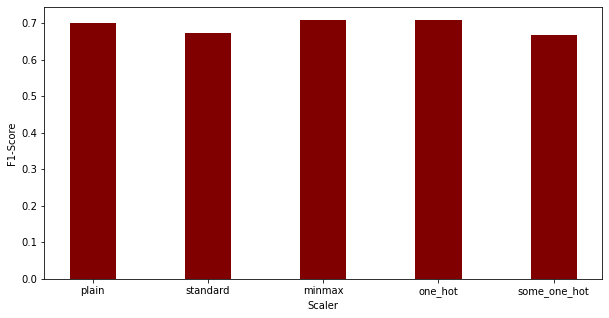

In [26]:
scalers = list(f1.keys())
f_scores = list(f1.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(scalers, f_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Scaler")
plt.ylabel("F1-Score")
plt.show()

In [27]:
f1

{'plain': 0.7007299270072992,
 'standard': 0.671875,
 'minmax': 0.7086614173228347,
 'one_hot': 0.7076923076923076,
 'some_one_hot': 0.6666666666666666}